<a href="https://colab.research.google.com/github/Alfredo2212/MIT-Applied-Data-Science/blob/main/Alfredo_Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
!pip install numpy==1.24.3
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

# Import label encoder
from sklearn.preprocessing import LabelEncoder

### **Load the dataset**

In [2]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [5]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [6]:
# Display first 10 records of song_df data
song_df.head(10)

,"gs""",Alpha and Oranges,Atomic Opera,0
SOZLUWO12A8C133A5E,Money,Money/Magazine,Daggers,0
SOUTZFE12A8C142F9D,Intro,The Hanging Man,Widescreen Mode,2009
SODOUJM12A8C135E1C,Wicked Lady,No_ I Never,Ndidi Onukwulu,2006
SORLUWJ12AB0182156,Skylark,The Best Of Paul Desmond,Paul Desmond,1973
SOHETMB12A6D4FBA0A,Money,The King Of Zydeco Live At Montreux_ Switzerland,Clifton Chenier,0
SOZHXEO12A8C14091F,Another Life,Put Your Hands Up,Master Blaster,2003
SOSDAHN12AB0187E0B,Sit Around And Suffer,Up Close And Personal,Merle Haggard,0
SOCJYHN12AB01821B3,Crimson Dynamo,E Coli,Ultradyne,1995
SOVEXZT12A8C13C62D,Don't Look Back,Live At The BBC,Lloyd Cole,1990
SOOVPWO12AB018A369,Diesel Shower,Diesel Shower remixes,Angel Anx,0


In [3]:
# Drop unnamed:0 column for count_df
count_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Song ID Column Rename
song_df.reset_index(inplace=True)
song_df.rename(columns={
    'index':'song_id',
    'gs"':'title',
    'Alpha and Oranges':'release',
    'Atomic Opera':'artist_name',
    '0':'year'
}, inplace=True)

### **Let us check the data types and and missing values of each column**

In [9]:
# Display info of count_df
print(count_df.info())
count_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB
None


,0
user_id,0
song_id,0
play_count,0


In [10]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923488 entries, 0 to 923487
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      923488 non-null  object
 1   title        923472 non-null  object
 2   release      923482 non-null  object
 3   artist_name  923488 non-null  object
 4   year         923488 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 35.2+ MB


#### **Observations and Insights:
count data doesnt have any null values, while song_df need missing data handling.
Only play_count and year are numerical, the rest is categorical.
**


In [8]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
lmerge_count_song = pd.merge(count_df, song_df, how='left', on='song_id')

## Name the obtained dataframe as "df"
df = lmerge_count_song.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076639 entries, 0 to 2076638
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      object 
 1   song_id      object 
 2   play_count   int64  
 3   title        object 
 4   release      object 
 5   artist_name  object 
 6   year         float64
dtypes: float64(1), int64(1), object(5)
memory usage: 110.9+ MB


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,NaN,NaN,NaN,NaN
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005.0


In [9]:
# Apply label encoding for "user_id" and "song_id"
for col in ['user_id', 'song_id']:
  df[col] = LabelEncoder().fit_transform(df[col])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [10]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [11]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [12]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [13]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [14]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [12]:
# Check the shape of the data
df_final.shape

(149839, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].value_counts().nunique()

183

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].value_counts().nunique()

264

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].value_counts().nunique()

198

#### **Observations and Insights:
There are 183 unique user, 264 unique songs and 198 different artists
**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Top 5 most interacted songs
df_final['song_id'].value_counts().head(5).reset_index()

,song_id,count
0,8582,1634
1,6293,1286
2,3567,1004
3,4270,969
4,1286,932


Most interacted users

In [ ]:
# top 5 most interacted users
df_final['user_id'].value_counts().head(5).reset_index()

,user_id,count
0,61472,297
1,37049,259
2,15733,241
3,75144,226
4,9570,210


#### **Observations and Insights:
The most interacted songs, with its max value at 1634 interaction for song ID 8582
While the user that has most interaction are user ID 2771 with total of 297 interactions.
**


Songs released on yearly basis

In [ ]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
song_df.groupby('year')['song_id'].count().reset_index()

,year,song_id
0,0,447239
1,1922,5
2,1924,5
3,1925,7
4,1926,18
...,...,...
85,2007,36360
86,2008,32152
87,2009,28672
88,2010,8638


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149839 entries, 209 to 2076392
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      149839 non-null  int64  
 1   song_id      149839 non-null  int64  
 2   play_count   149839 non-null  int64  
 3   title        140034 non-null  object 
 4   release      140034 non-null  object 
 5   artist_name  140034 non-null  object 
 6   year         140034 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 9.1+ MB


In [15]:
# Imputing joined song_df columns with mode
impute_columns = ['title','release','artist_name','year']

for col in impute_columns:
  df_final[col].fillna(df_final[col].mode()[0], inplace=True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149839 entries, 209 to 2076392
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      149839 non-null  int64  
 1   song_id      149839 non-null  int64  
 2   play_count   149839 non-null  int64  
 3   title        149839 non-null  object 
 4   release      149839 non-null  object 
 5   artist_name  149839 non-null  object 
 6   year         149839 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 9.1+ MB


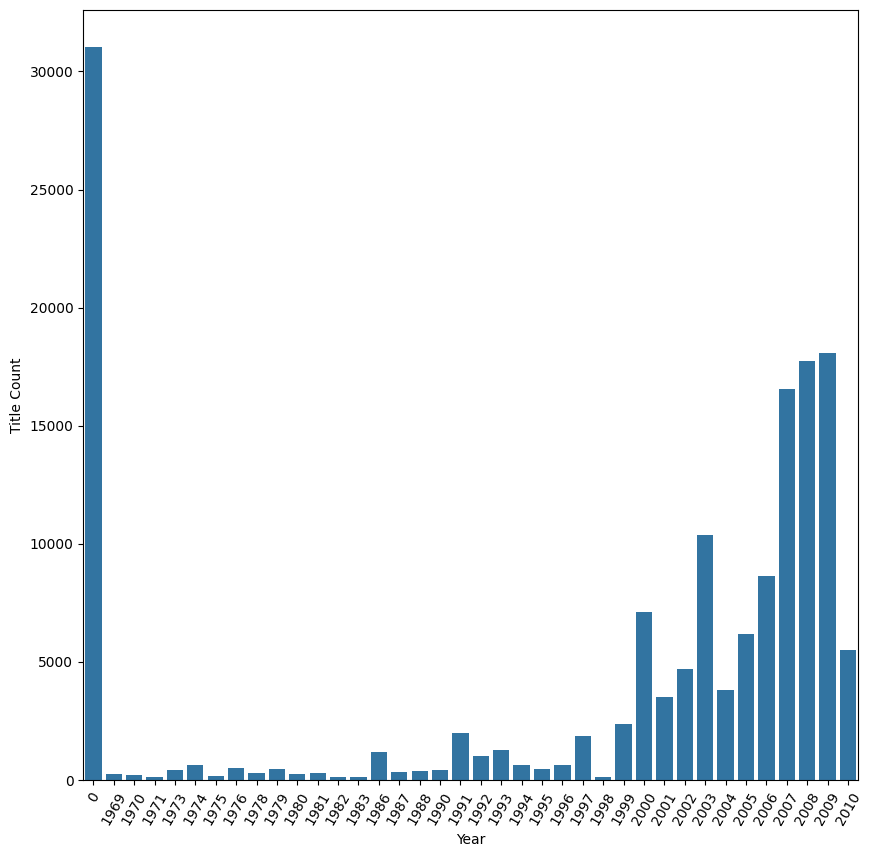

In [16]:
# Change year data type to int
df_final['year'] = df_final['year'].astype(int)
# Set the figure size
plt.figure(figsize=(10,10))
# Create a barplot plot with y label as "number of titles played" and x -axis year
sns.countplot(data= df_final, x='year')
# Set the x label of the plot
plt.xlabel('Year')
plt.xticks(rotation=60)
# Set the y label of the plot
plt.ylabel('Title Count')
# Show the plot
plt.show()

#### **Observations and Insights:
After missing value imputations with mode, Most song title have unknown year which is set to 0.
The known year that is likely to have most numbers of title played is at 2007 to 2009.
** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149839 entries, 209 to 2076392
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      149839 non-null  int64 
 1   song_id      149839 non-null  int64 
 2   play_count   149839 non-null  int64 
 3   title        149839 non-null  object
 4   release      149839 non-null  object
 5   artist_name  149839 non-null  object
 6   year         149839 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 9.1+ MB


In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].sum()

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({
    'average_count':average_count,
    'play_freq':play_freq
})
# Let us see the first five records of the final_play dataset
final_play.head().reset_index()

,song_id,average_count,play_freq
0,21,1.636364,450
1,22,1.457746,207
2,50,1.618182,178
3,52,1.719912,786
4,62,1.729508,211


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_music(data,col, n, min_interactions=100):
  recommendations = data[data[col]> min_interactions].sort_values(by=col, ascending=False)
  return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_music(final_play, 'play_freq', 10))

[8582, 6293, 1286, 3567, 352, 2220, 7796, 310, 5531, 4270]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install scikit-surprise==1.1.3

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp311-cp311-linux_x86_64.whl size=3311574 sha256=3fe9d55c388191db13d7ce871b113d9a870e3075655c1b9a5e7228c563ddd4f5
  Stored in directory: /root/.cache/pip/wheels/f4/2b/26/e2a5eae55d3b7688995e66abe7f40473aac6c95ddd8ee174a8
Successfully built scikit-surprise


In [26]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

# For random sampling
import random

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
df_reader = Dataset.load_from_df(df_final[['user_id','song_id','play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset= train_test_split(df_reader, test_size= 0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options={
    'name':'cosine',
    'user_based':True
}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user= KNNBasic(sim_options=sim_options, verbose=True, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0739
Precision:  0.405
Recall:  0.71
F_1 score:  0.516


**Observations and Insights:
Since the reader uses scale from 0 to 5, with RMSE of 1~ the predicted rating will have an average error of 1 either lower or higher.
This model have a very low precision which is worse than a random coin toss with an okay recall for 65%
**

In [ ]:
# Get random sample from train set
train_df = pd.DataFrame ([
    (trainset.to_raw_uid(uid), trainset.to_raw_iid(iid), rating)
    for uid, iid, rating in trainset.all_ratings()
], columns=['user_id','song_id','play_count'])

print(train_df.sample(1, random_state=1))

       user_id  song_id  play_count
75762    20114     6084         1.0


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(59148, 6175, r_ui=2, verbose=True)

user: 59148      item: 6175       r_ui = 2.00   est = 1.46   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=59148, iid=6175, r_ui=2, est=1.455117597233012, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Function to find song/user that never listened to user/song with song/user id
def find_uninteracted_id(data, _from, _find, _id):
  all_data = set(data[_find].unique())
  matched_data = set(data[data[_from]== _id][_find])
  unseen_data = list(all_data - matched_data)

  random.seed(1)
  random_data = random.choice(unseen_data)
  return random_data

In [ ]:
# Get unseen song for user_id 59148
find_uninteracted_id(df_final, 'user_id', 'song_id', 59148)

6646

In [ ]:
# Double check user - song interaction
df_final.loc[
    (df_final['user_id'] == 59148) &
    (df_final['song_id'] == 6646),
    'play_count'
]

,play_count


In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(59148, 6646, verbose=True)

user: 59148      item: 6646       r_ui = None   est = 1.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=59148, iid=6646, r_ui=None, est=1.546307125175003, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:
user 59148 successfully made a user user similarity prediction with 40 similiarities connections. Predicted 1.46 rating for song 6175 which has an actual rating of 2.00 and predicted 1.55 rating for song 6646 which the user never rated yet.
**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k':[30,40,50],
    'min_k':[6,9],
    'sim_options':{'name':['msd','cosine'],'user_based':[True]}
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs= GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(df_reader)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.000284909760665
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
sim_user_user_opt= KNNBasic(k=50, min_k=9, sim_options={'name':'msd', 'user_based':True})
sim_user_user_opt.fit(trainset)
precision_recall_at_k(sim_user_user_opt)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0092
Precision:  0.451
Recall:  0.651
F_1 score:  0.533


**Observations and Insights:
utilizing gridsearch, msd similarities with k = 50 and min_k = 9 has the lowest RMSE of 1~ among all other tuning parameters.
Model gain > 1 RMSE, lower recall with higher precision. F1 score increases.
It is not good enough since it is similar to coin toss accuracy
**

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_opt.predict(59148, 6175, r_ui=2, verbose=True)

user: 59148      item: 6175       r_ui = 2.00   est = 1.59   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=59148, iid=6175, r_ui=2, est=1.586071437542929, details={'actual_k': 50, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_opt.predict(59148, 6646, verbose=True)

user: 59148      item: 6646       r_ui = None   est = 1.54   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=59148, iid=6646, r_ui=None, est=1.5378677874696995, details={'actual_k': 50, 'was_impossible': False})

**Observations and Insights:
For this particular user ID of 59148, the train rating is closer than before optimisation.
**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
neighbours = sim_user_user_opt.get_neighbors(0, 5)

# Get neighbours user ID
neighbours_id = [trainset.to_raw_uid(inner_id) for inner_id in neighbours]
print(dict(zip(neighbours, neighbours_id)))

{13: 55566, 14: 65807, 26: 74986, 33: 43925, 38: 26390}


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data,index,column,value, user_id, top_n, algo):
    # Aggregate play_count before pivoting
    data = data.groupby([index, column])[value].sum().reset_index()
    # Creating an empty list to store the recommended song ids
    recommendations = []
    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index =index, columns=column, values=value)
    # Extracting those song ids which the user_id has not played yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est
        # Appending the predicted play_counts
        recommendations.append((item_id,est))
    # Sorting the predicted play_counts in descending order
    recommendations.sort(key= lambda x: x[1], reverse = True)

    return recommendations[:top_n]# Returning top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final,'user_id','song_id','play_count',59148,5,sim_user_user_opt)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id','predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.512014
1,8324,2.530209
2,6450,2.476132
3,8268,2.363990
4,4284,2.324071


**Observations and Insights:
The highest predicted ratings for song_id is 3.512 which is song 7224.
**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, play_count):
  # Sort the songs based on play counts
  ranked_songs = play_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending= False)[['play_freq']].reset_index()
  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns= ['song_id','predicted_ratings']), on= 'song_id', how='inner')
  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1/ np.sqrt(ranked_songs['play_freq'])
  # Sort the songs based on corrected play_counts
  ranked_songs= ranked_songs.sort_values('corrected_ratings', ascending = False)
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
1,7224,372,3.512014,3.460166
4,8324,269,2.530209,2.469238
2,6450,291,2.476132,2.417511
3,8268,284,2.363990,2.304651
0,4284,1001,2.324071,2.292464


**Observations and Insights:
The corrected ratings has lower value than the predicted ratings, since it penalizes more the lower the rating frequency the song have
**

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {
    'name':'cosine',
    'user_based':False
}

sim_item_item = KNNBasic(sim_options=sim_options, verbose = True, random_starte= 1)
sim_item_item.fit(trainset)
precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0026
Precision:  0.319
Recall:  0.55
F_1 score:  0.404


**Observations and Insights:
item-item collaborative filtering model has worse metrics than user-user collaborative filtering model.
**

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
r_ui=df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 1671)]['play_count'].mean()
sim_item_item.predict(6958, 1671, r_ui=r_ui, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.38   {'actual_k': 32, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3751866171285545, details={'actual_k': 32, 'was_impossible': False})

In [ ]:
# Finding user that never listened to song id 1671
find_uninteracted_id(df_final, 'song_id','user_id',1671)

50507

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(50507, 1671, verbose=True)

user: 50507      item: 1671       r_ui = None   est = 1.71   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=50507, iid=1671, r_ui=None, est=1.7148456656791276, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:
User 6958 with song 1671 has a predicted rating of 1.38 which actual rating of 2.00.
While estimating the rating for random user that never listened to song 1671, which is user 42261 the predicted rating is 2.47
**

In [ ]:
# Apply grid search for enhancing model performance
param_grid = {
    'k':[40,50,60],
    'min_k':[4,6,8],
    'sim_options':{
        'name':['cosine','msd'],
        'user_based':[False]
    }
}
# Setting up parameter grid to tune the hyperparameters
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv =3 , n_jobs=-1 )

# Fitting the data
gs.fit(df_reader)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.00407867810659
{'k': 40, 'min_k': 4, 'sim_options': {'name': 'msd', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
sim_item_item_opt= KNNBasic(k=40, min_k =4, sim_options={'name':'msd','user_based':False})
sim_item_item_opt.fit(trainset)
precision_recall_at_k(sim_item_item_opt)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0068
Precision:  0.356
Recall:  0.556
F_1 score:  0.434


**Observations and Insights:
F1 score is higher by a bit, means that the model actually perform better overall, yet recall goes down, if recommending all relevant songs to user is the objective, then this optimized model is unsuitable
**

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
r_ui = df_final[(df_final['user_id']==6958) & (df_final['song_id']==1671)]['play_count'].mean()
sim_item_item_opt.predict(6958,1671, r_ui=r_ui, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.41   {'actual_k': 22, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2.0, est=1.4114962371289967, details={'actual_k': 22, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_opt.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.51   {'actual_k': 21, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5074039114098352, details={'actual_k': 21, 'was_impossible': False})

**Observations and Insights:
user 6958 has predicted rating of 1.31 on song 1671 where the actual rating is 2.00.
for song 3232, user 6958 estimated to rate it at 1.63
**

In [ ]:
# Find five most similar items to the item with inner id 0
neighbours = sim_item_item_opt.get_neighbors(0, 5)

neighbours_id = [trainset.to_raw_uid(inner_id) for inner_id in neighbours]
print(dict(zip(neighbours, neighbours_id)))

{8: 31304, 9: 43585, 11: 67704, 33: 43925, 66: 63487}


In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 'user_id','song_id','play_count',6958, 5, sim_item_item_opt)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id','predicted_ratings'])

,song_id,predicted_ratings
0,3744,2.332189
1,8483,2.175179
2,5733,2.069776
3,3833,2.019630
4,5616,1.987936


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
1,3744,324,2.332189,2.276633
2,8483,300,2.175179,2.117444
4,5733,220,2.069776,2.002356
0,3833,396,2.019630,1.969378
3,5616,224,1.987936,1.921120


**Observations and Insight
It might be a good idea to propose song 3744 and 8483 to user 6958
**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)
svd.fit(trainset)
precision_recall_at_k(svd)

RMSE: 0.9862
Precision:  0.434
Recall:  0.663
F_1 score:  0.525


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4119128504539404, details={'was_impossible': False})

In [ ]:
# Finding user that never listened to song id 3232
find_uninteracted_id(df_final, 'song_id','user_id', 3232)

17760

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(17760,3232,verbose=True)

user: 17760      item: 3232       r_ui = None   est = 1.41   {'was_impossible': False}


Prediction(uid=17760, iid=3232, r_ui=None, est=1.4133486353370532, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {
    'n_epochs': [15,30],
    'lr_all': [0.002, 0.006],
    'reg_all': [0.3,0.5]
}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], n_jobs=-1)

# Fitting data
gs.fit(df_reader)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0039906203500273
{'n_epochs': 30, 'lr_all': 0.006, 'reg_all': 0.3}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_opt = SVD(n_epochs=30 ,lr_all=0.006 ,reg_all=0.3)
svd_opt.fit(trainset)
precision_recall_at_k(svd_opt)

RMSE: 1.0057
Precision:  0.411
Recall:  0.662
F_1 score:  0.507


**Observations and Insights:
SVD still have a lower F1 score than item-item collaborative filtering.
This optimization doesnt fine tune the model at all since the tuning resulted in worse model, might need to try more parameters.
**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
r_ui = df_final[(df_final['user_id']==6958) & (df_final['song_id']==1671)]['play_count'].mean()
svd_opt.predict(6958, 1671, r_ui=r_ui, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.42   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2.0, est=1.4161117563469503, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_opt.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.54   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5358219862036937, details={'was_impossible': False})

**Observations and Insights:
user 6958 with song 1671 estimated rating is 1.42 while the actual rating is 2.00.
for unseen song 3232 for user 6958, the estimated rating is 1.54
**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 'user_id', 'song_id', 'play_count', 6958, 5, svd_opt)

In [ ]:
# Ranking songs based on above recommendations
pd.DataFrame(recommendations, columns=['song_id','predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.829051
1,6450,2.455854
2,9942,2.163079
3,8324,2.117403
4,657,2.090602


**Observations and Insights:
Song id 7224 have the highest estimated rating of 2.82 for user 6958.
**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

clust_baseline.fit(trainset)

precision_recall_at_k(clust_baseline)

RMSE: 1.0326
Precision:  0.401
Recall:  0.579
F_1 score:  0.474


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
r_ui = df_final[(df_final['user_id']==6958)&(df_final['song_id']==1671)]['play_count'].mean()
clust_baseline.predict(6958,1671, r_ui=r_ui, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.94   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2.0, est=0.9402134349439237, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.16   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1626943128953704, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid= {
    'n_cltr_u': [4,5,6],
    'n_cltr_i': [4,5,6],
    'n_epochs': [35,50]
}
# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures =['rmse'], cv=3, n_jobs=-1)
# Fitting data
gs.fit(df_reader)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0350310177611437
{'n_cltr_u': 4, 'n_cltr_i': 5, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_opt = CoClustering(n_cltr_u =4, n_cltr_i =5, n_epochs=50 )
clust_opt.fit(trainset)
precision_recall_at_k(clust_opt)

RMSE: 1.0438
Precision:  0.406
Recall:  0.583
F_1 score:  0.479


**Observations and Insights:
The model improves slightly, although it is still not better than the other optimized model.
**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_opt.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.28   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2799457557410583, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_opt.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.50   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.502426633692505, details={'was_impossible': False})

**Observations and Insights:
user 6958 with song 1671 predicted rating is 1.28 with actual of 2, while unseen song 3232 recommend to user 6958 has predicted rating of 1.50
**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 'user_id','song_id','play_count',6958, 5, clust_opt)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
pd.DataFrame(recommendations, columns=['song_id','predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.319952
1,614,3.157678
2,5653,3.152919
3,1664,3.137336
4,9509,3.020974


**Observations and Insights:
This model predict that user 6958 will give a high rating for top recommended songs though. The highest rating is 3.319 for song 7224.
**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [19]:
df_final.head(2)

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000.0
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004.0


In [64]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text']= df_final['title'] + " " + df_final['release'] + " " + df_final['artist_name']

df_final.head(2)

,user_id,song_id,play_count,title,release,artist_name,year,text
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...


In [65]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final[['user_id','song_id','play_count','title','text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset = 'title')

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
Use Somebody,6958,549,1,Use Somebody My Worlds Coldplay
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [43]:
# Create the series of indices from the data
df_small.reset_index().head()

,title,user_id,song_id,play_count,text
0,Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
1,The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
2,Use Somebody,6958,549,1,Use Somebody My Worlds Coldplay
3,They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
4,Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [21]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')
# Download punkt library
nltk.download('punkt')
nltk.download('punkt_tab')
# Download stopwords library
nltk.download('stopwords')
# Download wordnet
nltk.download('wordnet')
# Import regular expression
import re
# Import word_tokenizer
from nltk import word_tokenize
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Import stopwords
from nltk.corpus import stopwords
# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [68]:
# The dataset is too large, machine cannot handle, so i decided to do random sampling
df_small.shape
df_small = df_small.sample(5000, random_state=1)
print(df_small[df_small.index == 'Learn To Fly'].shape) # ensuring learn to fly is sampled

(11, 4)


In [69]:
# Create a function to tokenize the text
def tokenize(text):

  text = re.sub(r"[^a-zA-Z]"," ", text.lower())
  tokens = word_tokenize(text)
  words = [word for word in tokens if word not in stopwords.words("english")]
  text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

  return text_lems

In [70]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [71]:
# Compute the cosine similarity for the tfidf above output
# Calculating the cosine similarity
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.12787594, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12787594, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [72]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(data, title, similar_songs):
    recommended_songs = []
    indices = pd.Series(data.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending=False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(data.index)[i])

    return top_10_indexes, recommended_songs

Recommending 10 songs similar to Learn to Fly

In [74]:
# Make the recommendation for the song with title 'Learn To Fly'
rec_index, rec_title = recommendations(df_small, 'Learn To Fly', similar_songs)
# Print the title for recommendation
df = pd.DataFrame({
    'Index':rec_index,
    'Title':rec_title
})
df

,Index,Title
0,898,Learn To Fly
1,2851,Learn To Fly
2,1677,Learn To Fly
3,4646,Learn To Fly
4,4235,Learn To Fly
5,3418,Learn To Fly
6,1007,Learn To Fly
7,4288,Learn To Fly
8,4536,Learn To Fly
9,4941,Learn To Fly


**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?